In [2]:
import json

In [6]:
basic_athlete_info = json.loads('''{
    "id": 3506416,
    "username": "rhish_hatt",
    "resource_state": 2,
    "firstname": "Rhish",
    "lastname": "Hatt",
    "bio": "ASU Grad Student 🔱 🚴‍♂️",
    "city": "Tempe",
    "state": "Arizona",
    "country": "United States",
    "sex": "M",
    "premium": true,
    "summit": true,
    "created_at": "2013-12-17T14:40:20Z",
    "updated_at": "2023-09-18T01:41:06Z",
    "badge_type_id": 1,
    "weight": 79.0,
    "profile_medium": "https://dgalywyr863hv.cloudfront.net/pictures/athletes/3506416/1139281/30/medium.jpg",
    "profile": "https://dgalywyr863hv.cloudfront.net/pictures/athletes/3506416/1139281/30/large.jpg",
    "friend": null,
    "follower": null
}''')

print(basic_athlete_info)

{'id': 3506416, 'username': 'rhish_hatt', 'resource_state': 2, 'firstname': 'Rhish', 'lastname': 'Hatt', 'bio': 'ASU Grad Student 🔱 🚴\u200d♂️', 'city': 'Tempe', 'state': 'Arizona', 'country': 'United States', 'sex': 'M', 'premium': True, 'summit': True, 'created_at': '2013-12-17T14:40:20Z', 'updated_at': '2023-09-18T01:41:06Z', 'badge_type_id': 1, 'weight': 79.0, 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/3506416/1139281/30/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/3506416/1139281/30/large.jpg', 'friend': None, 'follower': None}


In [18]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"
access_token = "bdf53f4dad1073eb68c4a8451ee17efddb73e466"
header = {'Authorization': 'Bearer ' + access_token}
full_dataset = []
page = 1

while True:
    param = {'per_page': 200, 'page': page}
    page_dataset = requests.get(activites_url, headers=header, params=param).json()
    if len(page_dataset) == 0:
        break
    page += 1
    full_dataset.extend(page_dataset)

print(len(full_dataset))

1586


In [28]:
import pickle

with open('strava_data_python_dict.pickle', 'wb') as data_pickle:
    pickle.dump(full_dataset, data_pickle, protocol=pickle.HIGHEST_PROTOCOL)    

In [30]:
json.dumps(full_dataset[2])

'{"resource_state": 2, "athlete": {"id": 3506416, "resource_state": 1}, "name": "AZ State ITT - 7th/11 in Men Merckx - destroyed by the headwind", "distance": 39964.1, "moving_time": 4020, "elapsed_time": 4020, "total_elevation_gain": 42.0, "type": "Ride", "sport_type": "Ride", "workout_type": 11, "id": 9912737242, "start_date": "2023-09-24T14:45:58Z", "start_date_local": "2023-09-24T07:45:58Z", "timezone": "(GMT-07:00) America/Phoenix", "utc_offset": -25200.0, "location_city": null, "location_state": null, "location_country": "United States", "achievement_count": 0, "kudos_count": 25, "comment_count": 6, "athlete_count": 3, "photo_count": 0, "map": {"id": "a9912737242", "summary_polyline": "ykgfEhyzfTbUw\\\\xAsB~AqB~`@se@j_@qc@pCwCpDeDdiAc}@~L}Jpi@ob@rO_MbHsFrIaHxk@od@tDuCfLgJxMgKpJyHbKaIz[gWnAaAdAs@lAo@jCoAdAq@|I_HlQqNbA}@fBkB~BuCd@g@|A{AnDqCbEwCrPuMnWwShM{J~c@a^rXiTrIaHhY}T|VeS|KuIvl@me@vEoDrQuNzDyC`r@wi@vFqEb^}XzEyDlVmRdBgAbFkCtCmBbZoUJOAECAEB_\\\\dWwChBmDhBkAp@gAx@cDfCql@de@o`@|Ze

In [85]:
import pandas as pd

df = pd.DataFrame(full_dataset)

In [86]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
df.head()

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,average_watts,max_watts,weighted_average_watts,kilojoules,device_watts,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score
0,2,"{'id': 3506416, 'resource_state': 1}",Lunch Ride,3564.2,723,830,3.0,Ride,Ride,NaN,9913883505,2023-09-24T18:41:03Z,2023-09-24T11:41:03Z,(GMT-07:00) America/Phoenix,-25200.0,None,None,United States,0,11,0,1,0,"{'id': 'a9913883505', 'summary_polyline': 'al_...",False,False,False,False,everyone,False,b12532853,"[33.425444243475795, -111.94648995995522]","[33.419371051713824, -111.92317754030228]",4.930,9.588,84.5,33.0,81.3,807.0,93.0,58.8,True,True,127.9,147.0,False,True,355.6,348.4,1.062527e+10,10625272364,garmin_ping_296232055012,False,0,0,False,3.0
1,2,"{'id': 3506416, 'resource_state': 1}",Morning Ride,4904.7,1355,1355,3.0,Ride,Ride,NaN,9912921254,2023-09-24T15:54:28Z,2023-09-24T08:54:28Z,(GMT-07:00) America/Phoenix,-25200.0,None,None,United States,0,8,0,1,0,"{'id': 'a9912921254', 'summary_polyline': 'woh...",False,False,False,False,everyone,False,b12532853,"[32.6519475504756, -111.39609991572797]","[32.650608625262976, -111.39441523700953]",3.620,6.050,71.2,27.0,30.7,202.0,45.0,41.6,True,True,126.4,153.0,False,True,545.0,534.4,1.062426e+10,10624263906,garmin_ping_296211250274,False,0,0,False,5.0
2,2,"{'id': 3506416, 'resource_state': 1}",AZ State ITT - 7th/11 in Men Merckx - destroye...,39964.1,4020,4020,42.0,Ride,Ride,11.0,9912737242,2023-09-24T14:45:58Z,2023-09-24T07:45:58Z,(GMT-07:00) America/Phoenix,-25200.0,None,None,United States,0,25,6,3,0,"{'id': 'a9912737242', 'summary_polyline': 'ykg...",False,False,False,False,everyone,False,b12532853,"[32.64717631973326, -111.38980829156935]","[32.647236585617065, -111.38979689218104]",9.941,15.096,86.7,22.0,249.9,731.0,249.0,1004.5,True,True,175.6,185.0,False,True,583.6,536.4,1.062407e+10,10624071939,garmin_ping_296207949248,False,0,6,False,211.0
3,2,"{'id': 3506416, 'resource_state': 1}",Morning Ride,2744.7,427,427,1.0,Ride,Ride,NaN,9912187409,2023-09-24T14:36:32Z,2023-09-24T07:36:32Z,(GMT-07:00) America/Phoenix,-25200.0,None,None,United States,0,6,0,3,0,"{'id': 'a9912187409', 'summary_polyline': 'wvg...",False,False,False,False,everyone,False,b12532853,"[32.65025801025331, -111.39397384598851]","[32.647967990487814, -111.39085778966546]",6.428,11.564,81.0,19.0,131.5,487.0,154.0,56.1,True,True,132.1,154.0,False,True,522.0,519.4,1.062350e+10,10623497643,garmin_ping_296198158652,False,0,0,False,2.0
4,2,"{'id': 3506416, 'resource_state': 1}",New tyre testing,29299.1,4662,5821,52.0,Ride,Ride,10.0,9901444795,2023-09-22T22:39:32Z,2023-09-22T15:39:32Z,(GMT-07:00) America/Phoenix,-25200.0,None,None,United States,5,23,0,1,0,"{'id': 'a9901444795', 'summary_polyline': '{f~...",False,False,False,False,everyone,False,b12532853,"[33.41989994980395, -111.92341181449592]","[33.41937582939863, -111.92321039736271]",6.285,12.682,83.1,31.0,125.4,954.0,167.0,584.7,True,True,135.3,190.0,False,True,421.0,384.0,1.061218e+10,10612179069,garmin_ping_295937594218,False,2,1,False,42.0


In [87]:
df.tail()

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,average_watts,max_watts,weighted_average_watts,kilojoules,device_watts,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score
1581,2,"{'id': 3506416, 'resource_state': 1}",Morning quickie,21360.6,3429,4037,193.1,Ride,Ride,NaN,101915468,2013-12-26T00:41:59Z,2013-12-26T06:11:59Z,(GMT+05:30) Asia/Kolkata,19800.0,Pune,MH,India,5,0,0,1,0,"{'id': 'a101915468', 'summary_polyline': 'g|}o...",False,False,False,False,everyone,False,b1081294,"[18.508452, 73.790259]","[18.509716, 73.788072]",6.229,13.9,NaN,NaN,114.3,NaN,NaN,392.1,False,False,NaN,NaN,False,False,663.2,551.4,111431783.0,111431783,12448D74-ED27-4042-9DE9-37F3088E19DC,False,4,0,False,NaN
1582,2,"{'id': 3506416, 'resource_state': 1}",Necklace loop with arai,24106.3,3704,4795,297.9,Ride,Ride,NaN,101640999,2013-12-24T00:43:50Z,2013-12-24T06:13:50Z,(GMT+05:30) Asia/Kolkata,19800.0,Pune,MH,India,5,0,0,1,0,"{'id': 'a101640999', 'summary_polyline': 'o|}o...",False,False,False,False,everyone,False,b1081294,"[18.50829, 73.790242]","[18.509713, 73.788052]",6.508,13.0,NaN,NaN,130.8,NaN,NaN,484.6,False,False,NaN,NaN,False,False,670.1,567.9,111131538.0,111131538,33E0CC5C-C67F-4F32-ACFF-210DED039CE5,False,5,0,False,NaN
1583,2,"{'id': 3506416, 'resource_state': 1}",Morning Ride,22477.9,3159,3159,265.0,Ride,Ride,NaN,101505856,2013-12-23T01:01:14Z,2013-12-23T06:31:14Z,(GMT+05:30) Asia/Kolkata,19800.0,Pune,MH,India,3,1,0,1,0,"{'id': 'a101505856', 'summary_polyline': 'i|}o...",False,False,False,False,everyone,False,b1081294,"[18.509687, 73.788011]","[18.509672, 73.788027]",7.116,17.2,NaN,NaN,138.5,NaN,NaN,437.5,False,False,NaN,NaN,False,False,663.8,584.3,110982840.0,110982840,D8D93A54-F378-49D9-BA2C-9FD6C4879555,False,1,0,False,NaN
1584,2,"{'id': 3506416, 'resource_state': 1}",Morning Ride,18113.8,2695,2695,183.0,Ride,Ride,NaN,101017658,2013-12-20T00:52:37Z,2013-12-20T06:22:37Z,(GMT+05:30) Asia/Kolkata,19800.0,Pune,MH,India,1,0,0,1,0,"{'id': 'a101017658', 'summary_polyline': 'i|}o...",False,False,False,False,everyone,False,b1081294,"[18.509514, 73.788157]","[18.50948, 73.788237]",6.721,15.0,NaN,NaN,128.9,NaN,NaN,347.3,False,False,NaN,NaN,False,False,663.3,584.1,110454042.0,110454042,EEA2B8D9-1CBC-44E0-8C0B-E665DECC38EC,False,0,0,False,NaN
1585,2,"{'id': 3506416, 'resource_state': 1}",Morning Ride,18797.8,2510,2510,174.5,Ride,Ride,NaN,100725977,2013-12-18T00:42:13Z,2013-12-18T06:12:13Z,(GMT+05:30) Asia/Kolkata,19800.0,Pune,MH,India,2,0,0,1,0,"{'id': 'a100725977', 'summary_polyline': '{{}o...",False,False,False,False,everyone,False,None,"[18.509647, 73.788261]","[18.509685, 73.788085]",7.489,14.1,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,False,False,664.2,567.8,110156907.0,110156907,9E9074B0-AC14-4332-90BB-9262CDF8971F,False,0,0,False,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resource_state                 1586 non-null   int64  
 1   athlete                        1586 non-null   object 
 2   name                           1586 non-null   object 
 3   distance                       1586 non-null   float64
 4   moving_time                    1586 non-null   int64  
 5   elapsed_time                   1586 non-null   int64  
 6   total_elevation_gain           1586 non-null   float64
 7   type                           1586 non-null   object 
 8   sport_type                     1586 non-null   object 
 9   workout_type                   788 non-null    float64
 10  id                             1586 non-null   int64  
 11  start_date                     1586 non-null   object 
 12  start_date_local               1586 non-null   o

In [89]:
df.describe()

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,workout_type,id,utc_offset,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed,average_cadence,average_temp,average_watts,max_watts,weighted_average_watts,kilojoules,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,pr_count,total_photo_count,suffer_score
count,1586.0,1586.000000,1586.000000,1.586000e+03,1586.000000,788.000000,1.586000e+03,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.0,1586.000000,1586.000000,694.000000,815.000000,1372.000000,610.000000,610.000000,1372.000000,901.000000,901.000000,1529.000000,1529.000000,1.584000e+03,1586.000000,1586.000000,904.000000
mean,2.0,33294.370240,5079.875158,2.756729e+05,311.814124,8.470812,2.866887e+09,12593.190416,4.312736,16.772383,0.937579,1.745271,0.0,6.192291,12.504759,82.437896,21.312883,135.218440,632.595082,169.419672,777.597668,137.349057,167.831299,651.753564,554.846239,3.074681e+09,1.540984,0.125473,64.651549
std,0.0,29819.385303,4123.521390,1.073685e+07,477.720807,3.649569,3.214000e+09,16508.790631,11.448055,12.075703,2.525432,3.172744,0.0,2.210344,4.461734,9.639675,5.578039,44.324677,357.837161,43.773236,680.335920,19.450446,21.135393,184.524553,137.118737,3.434546e+09,4.747760,0.577185,61.627783
min,2.0,0.000000,89.000000,8.900000e+01,0.000000,0.000000,1.007260e+08,-25200.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,36.700000,7.000000,0.400000,66.000000,3.000000,0.200000,44.700000,70.000000,0.000000,-53.000000,1.101569e+08,0.000000,0.000000,0.000000
25%,2.0,8614.250000,2102.500000,2.401000e+03,0.000000,10.000000,4.151952e+08,19800.000000,0.000000,6.000000,0.000000,1.000000,0.0,5.392250,10.100000,78.900000,18.000000,103.475000,378.000000,144.250000,279.150000,125.000000,155.000000,631.000000,548.600000,4.649201e+08,0.000000,0.000000,15.000000
50%,2.0,25625.600000,3891.500000,4.500000e+03,133.000000,10.000000,1.315509e+09,19800.000000,0.000000,17.000000,0.000000,1.000000,0.0,6.376000,13.400000,83.900000,22.000000,134.950000,522.500000,177.000000,608.600000,140.300000,176.000000,662.100000,570.900000,1.422842e+09,0.000000,0.000000,54.000000
75%,2.0,49391.575000,7240.500000,8.351250e+03,448.925000,10.000000,4.718611e+09,19800.000000,4.000000,25.000000,0.000000,1.000000,0.0,7.646000,15.800000,89.000000,25.000000,164.700000,816.000000,199.000000,1137.750000,150.000000,184.000000,699.600000,623.400000,5.034710e+09,1.000000,0.000000,92.000000
max,2.0,162929.000000,51131.000000,4.275968e+08,4011.100000,11.000000,9.913884e+09,19800.000000,153.000000,56.000000,23.000000,48.000000,0.0,12.414000,23.400000,106.000000,40.000000,379.400000,2000.000000,269.000000,3862.500000,186.700000,201.000000,1426.600000,1359.100000,1.062527e+10,54.000000,10.000000,401.000000


In [90]:
df.describe(include=['O'])

,athlete,name,type,sport_type,start_date,start_date_local,timezone,location_city,location_state,location_country,map,visibility,gear_id,start_latlng,end_latlng,device_watts,upload_id_str,external_id
count,1586,1586,1586,1586,1586,1586,1586,707,710,1586,1586,1586,1432,1586,1586,1373,1584,1584
unique,1,856,9,9,1586,1586,3,18,4,2,1586,3,6,1223,1217,2,1584,1583
top,"{'id': 3506416, 'resource_state': 1}",Morning Ride,Ride,Ride,2023-09-24T18:41:03Z,2023-09-24T11:41:03Z,(GMT+05:30) Asia/Kolkata,Pune,MH,India,"{'id': 'a9913883505', 'summary_polyline': 'al_...",everyone,b2517905,[],[],False,10625272364,77d628a2-7471-4e6c-b1a1-7103fa3a29d4-activity.fit
freq,1586,263,1422,1422,1,1,1332,682,676,1350,1,1432,753,362,362,763,1,2


In [91]:
df_dropped = df.drop(columns=['resource_state',	'athlete', 'id', 'location_city', 'location_state', 'photo_count',	'private', 'visibility', 'total_photo_count'])

df_dropped.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,start_date,start_date_local,timezone,utc_offset,location_country,achievement_count,kudos_count,comment_count,athlete_count,map,trainer,commute,manual,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,average_watts,max_watts,weighted_average_watts,kilojoules,device_watts,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,has_kudoed,suffer_score
0,Lunch Ride,3564.2,723,830,3.0,Ride,Ride,NaN,2023-09-24T18:41:03Z,2023-09-24T11:41:03Z,(GMT-07:00) America/Phoenix,-25200.0,United States,0,11,0,1,"{'id': 'a9913883505', 'summary_polyline': 'al_...",False,False,False,False,b12532853,"[33.425444243475795, -111.94648995995522]","[33.419371051713824, -111.92317754030228]",4.930,9.588,84.5,33.0,81.3,807.0,93.0,58.8,True,True,127.9,147.0,False,True,355.6,348.4,1.062527e+10,10625272364,garmin_ping_296232055012,False,0,False,3.0
1,Morning Ride,4904.7,1355,1355,3.0,Ride,Ride,NaN,2023-09-24T15:54:28Z,2023-09-24T08:54:28Z,(GMT-07:00) America/Phoenix,-25200.0,United States,0,8,0,1,"{'id': 'a9912921254', 'summary_polyline': 'woh...",False,False,False,False,b12532853,"[32.6519475504756, -111.39609991572797]","[32.650608625262976, -111.39441523700953]",3.620,6.050,71.2,27.0,30.7,202.0,45.0,41.6,True,True,126.4,153.0,False,True,545.0,534.4,1.062426e+10,10624263906,garmin_ping_296211250274,False,0,False,5.0
2,AZ State ITT - 7th/11 in Men Merckx - destroye...,39964.1,4020,4020,42.0,Ride,Ride,11.0,2023-09-24T14:45:58Z,2023-09-24T07:45:58Z,(GMT-07:00) America/Phoenix,-25200.0,United States,0,25,6,3,"{'id': 'a9912737242', 'summary_polyline': 'ykg...",False,False,False,False,b12532853,"[32.64717631973326, -111.38980829156935]","[32.647236585617065, -111.38979689218104]",9.941,15.096,86.7,22.0,249.9,731.0,249.0,1004.5,True,True,175.6,185.0,False,True,583.6,536.4,1.062407e+10,10624071939,garmin_ping_296207949248,False,0,False,211.0
3,Morning Ride,2744.7,427,427,1.0,Ride,Ride,NaN,2023-09-24T14:36:32Z,2023-09-24T07:36:32Z,(GMT-07:00) America/Phoenix,-25200.0,United States,0,6,0,3,"{'id': 'a9912187409', 'summary_polyline': 'wvg...",False,False,False,False,b12532853,"[32.65025801025331, -111.39397384598851]","[32.647967990487814, -111.39085778966546]",6.428,11.564,81.0,19.0,131.5,487.0,154.0,56.1,True,True,132.1,154.0,False,True,522.0,519.4,1.062350e+10,10623497643,garmin_ping_296198158652,False,0,False,2.0
4,New tyre testing,29299.1,4662,5821,52.0,Ride,Ride,10.0,2023-09-22T22:39:32Z,2023-09-22T15:39:32Z,(GMT-07:00) America/Phoenix,-25200.0,United States,5,23,0,1,"{'id': 'a9901444795', 'summary_polyline': '{f~...",False,False,False,False,b12532853,"[33.41989994980395, -111.92341181449592]","[33.41937582939863, -111.92321039736271]",6.285,12.682,83.1,31.0,125.4,954.0,167.0,584.7,True,True,135.3,190.0,False,True,421.0,384.0,1.061218e+10,10612179069,garmin_ping_295937594218,False,2,False,42.0


In [92]:
df_rides = df_dropped.loc[df_dropped['type'] == 'Ride']

df_rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1585
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1422 non-null   object 
 1   distance                       1422 non-null   float64
 2   moving_time                    1422 non-null   int64  
 3   elapsed_time                   1422 non-null   int64  
 4   total_elevation_gain           1422 non-null   float64
 5   type                           1422 non-null   object 
 6   sport_type                     1422 non-null   object 
 7   workout_type                   715 non-null    float64
 8   start_date                     1422 non-null   object 
 9   start_date_local               1422 non-null   object 
 10  timezone                       1422 non-null   object 
 11  utc_offset                     1422 non-null   float64
 12  location_country               1422 non-null   object

In [93]:
df_non_manual_or_flagged = df_rides.loc[(df_rides['manual'] == False) & (df_rides['flagged'] == False)]

df_non_manual_or_flagged.info()
df_non_manual_or_flagged.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 0 to 1585
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1420 non-null   object 
 1   distance                       1420 non-null   float64
 2   moving_time                    1420 non-null   int64  
 3   elapsed_time                   1420 non-null   int64  
 4   total_elevation_gain           1420 non-null   float64
 5   type                           1420 non-null   object 
 6   sport_type                     1420 non-null   object 
 7   workout_type                   714 non-null    float64
 8   start_date                     1420 non-null   object 
 9   start_date_local               1420 non-null   object 
 10  timezone                       1420 non-null   object 
 11  utc_offset                     1420 non-null   float64
 12  location_country               1420 non-null   object

,name,type,sport_type,start_date,start_date_local,timezone,location_country,map,gear_id,start_latlng,end_latlng,device_watts,upload_id_str,external_id
count,1420,1420,1420,1420,1420,1420,1420,1420,1419,1420,1420,1360,1420,1420
unique,779,1,1,1420,1420,2,2,1420,6,1137,1131,2,1420,1420
top,Morning Ride,Ride,Ride,2023-09-24T18:41:03Z,2023-09-24T11:41:03Z,(GMT+05:30) Asia/Kolkata,India,"{'id': 'a9913883505', 'summary_polyline': 'al_...",b2517905,[],[],False,10625272364,garmin_ping_296232055012
freq,263,1420,1420,1,1,1186,1204,1,741,282,282,760,1,1


In [99]:
value_counts = df_non_manual_or_flagged[['manual', 'flagged', 'commute', 'trainer', 'heartrate_opt_out', 
                                         'display_hide_heartrate_option', 'from_accepted_tag']].applymap(lambda x: x if isinstance(x, bool) else None).apply(pd.value_counts)
value_counts = value_counts.fillna(0).astype(int)  # Fill NaNs with 0 and convert to integer

# Display the value counts for all columns
print(value_counts)

df_all_rides = df_non_manual_or_flagged.drop(columns=['type', 'sport_type', 'workout_type', 'manual', 'flagged', 'commute', 'trainer', 
                                                      'heartrate_opt_out', 'display_hide_heartrate_option', 'from_accepted_tag', 
                                                      'map', 'start_latlng', 'end_latlng', 'start_date_local', 'timezone', 'utc_offset'])


df_all_rides.info()
df_all_rides.head()

       manual  flagged  commute  trainer  heartrate_opt_out  \
False    1420     1420     1398     1143               1420   
True        0        0       22      277                  0   

       display_hide_heartrate_option  from_accepted_tag  
False                            640               1420  
True                             780                  0  
<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 0 to 1585
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1420 non-null   object 
 1   distance                1420 non-null   float64
 2   moving_time             1420 non-null   int64  
 3   elapsed_time            1420 non-null   int64  
 4   total_elevation_gain    1420 non-null   float64
 5   start_date              1420 non-null   object 
 6   location_country        1420 non-null   object 
 7   achievement_count       1420 non-null   int64  
 8  

/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_73260/3276792800.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  'display_hide_heartrate_option', 'from_accepted_tag']].applymap(lambda x: x if isinstance(x, bool) else None).apply(pd.value_counts)
/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_73260/3276792800.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  'display_hide_heartrate_option', 'from_accepted_tag']].applymap(lambda x: x if isinstance(x, bool) else None).apply(pd.value_counts)


,name,distance,moving_time,elapsed_time,total_elevation_gain,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,gear_id,average_speed,max_speed,average_cadence,average_temp,average_watts,max_watts,weighted_average_watts,kilojoules,device_watts,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,upload_id_str,external_id,pr_count,has_kudoed,suffer_score
0,Lunch Ride,3564.2,723,830,3.0,2023-09-24T18:41:03Z,United States,0,11,0,1,b12532853,4.930,9.588,84.5,33.0,81.3,807.0,93.0,58.8,True,True,127.9,147.0,355.6,348.4,1.062527e+10,10625272364,garmin_ping_296232055012,0,False,3.0
1,Morning Ride,4904.7,1355,1355,3.0,2023-09-24T15:54:28Z,United States,0,8,0,1,b12532853,3.620,6.050,71.2,27.0,30.7,202.0,45.0,41.6,True,True,126.4,153.0,545.0,534.4,1.062426e+10,10624263906,garmin_ping_296211250274,0,False,5.0
2,AZ State ITT - 7th/11 in Men Merckx - destroye...,39964.1,4020,4020,42.0,2023-09-24T14:45:58Z,United States,0,25,6,3,b12532853,9.941,15.096,86.7,22.0,249.9,731.0,249.0,1004.5,True,True,175.6,185.0,583.6,536.4,1.062407e+10,10624071939,garmin_ping_296207949248,0,False,211.0
3,Morning Ride,2744.7,427,427,1.0,2023-09-24T14:36:32Z,United States,0,6,0,3,b12532853,6.428,11.564,81.0,19.0,131.5,487.0,154.0,56.1,True,True,132.1,154.0,522.0,519.4,1.062350e+10,10623497643,garmin_ping_296198158652,0,False,2.0
4,New tyre testing,29299.1,4662,5821,52.0,2023-09-22T22:39:32Z,United States,5,23,0,1,b12532853,6.285,12.682,83.1,31.0,125.4,954.0,167.0,584.7,True,True,135.3,190.0,421.0,384.0,1.061218e+10,10612179069,garmin_ping_295937594218,2,False,42.0


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [123]:
df_all_rides['start_date'] = pd.to_datetime(df_all_rides['start_date'])
df_all_rides['start_date'] = df_all_rides['start_date'].dt.date
df_all_rides['average_speed'] = df_all_rides['average_speed'] * 3.6 # converting from meters/sec to km/hr

df_all_rides.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,gear_id,average_speed,max_speed,average_cadence,average_temp,average_watts,max_watts,weighted_average_watts,kilojoules,device_watts,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,upload_id_str,external_id,pr_count,has_kudoed,suffer_score,start_date_unix
0,Lunch Ride,3564.2,723,830,3.0,2023-09-24,United States,0,11,0,1,b12532853,63.89280,9.588,84.5,33.0,81.3,807.0,93.0,58.8,True,True,127.9,147.0,355.6,348.4,1.062527e+10,10625272364,garmin_ping_296232055012,0,False,3.0,2023-09-24
1,Morning Ride,4904.7,1355,1355,3.0,2023-09-24,United States,0,8,0,1,b12532853,46.91520,6.050,71.2,27.0,30.7,202.0,45.0,41.6,True,True,126.4,153.0,545.0,534.4,1.062426e+10,10624263906,garmin_ping_296211250274,0,False,5.0,2023-09-24
2,AZ State ITT - 7th/11 in Men Merckx - destroye...,39964.1,4020,4020,42.0,2023-09-24,United States,0,25,6,3,b12532853,128.83536,15.096,86.7,22.0,249.9,731.0,249.0,1004.5,True,True,175.6,185.0,583.6,536.4,1.062407e+10,10624071939,garmin_ping_296207949248,0,False,211.0,2023-09-24
3,Morning Ride,2744.7,427,427,1.0,2023-09-24,United States,0,6,0,3,b12532853,83.30688,11.564,81.0,19.0,131.5,487.0,154.0,56.1,True,True,132.1,154.0,522.0,519.4,1.062350e+10,10623497643,garmin_ping_296198158652,0,False,2.0,2023-09-24
4,New tyre testing,29299.1,4662,5821,52.0,2023-09-22,United States,5,23,0,1,b12532853,81.45360,12.682,83.1,31.0,125.4,954.0,167.0,584.7,True,True,135.3,190.0,421.0,384.0,1.061218e+10,10612179069,garmin_ping_295937594218,2,False,42.0,2023-09-22


19358


/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_73260/3105817928.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


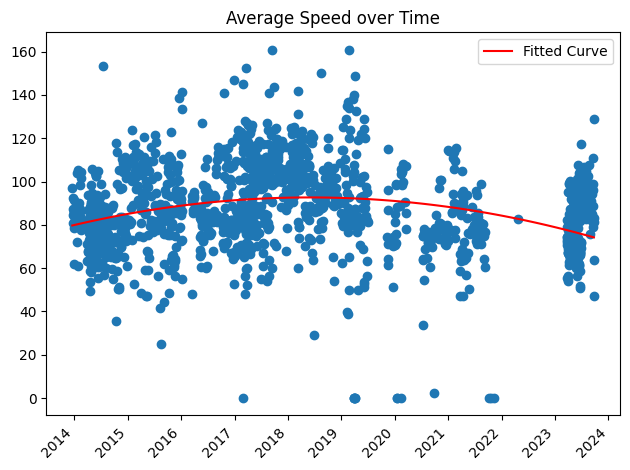

In [133]:
from scipy.optimize import curve_fit
import datetime

fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(df_all_rides.start_date)  #convert data to numpy array
y = np.asarray(df_all_rides.average_speed)
ax1.plot_date(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')

# Convert datetime.date to Unix timestamp (float)
reference_date = datetime.date(1970, 1, 1)
print((datetime.date(2023, 1, 1) - reference_date).days)
df_all_rides['start_date_unix'] = df_all_rides['start_date'].apply(lambda x : (x - reference_date).days)

# add trend line
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the curve to the data
params, covariance = curve_fit(quadratic_func, df_all_rides['start_date_unix'], y)

# Create an array of x values for the curve
x_fit = np.linspace((min(x) - reference_date).days, (max(x) - reference_date).days, 100)

# Calculate the corresponding y values using the fitted parameters
y_fit = quadratic_func(x_fit, *params)

# Plot the fitted curve
ax1.plot(x_fit, y_fit, 'r-', label='Fitted Curve')

#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
# Add a legend
ax1.legend()
fig.show()